In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data=pd.read_csv("/content/vehicles1.csv")

In [ ]:
data.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color
0,3495,2012.0,jeep,patriot,like new,4 cylinders,gas,NaN,clean,automatic,NaN,NaN,NaN,silver
1,13750,2014.0,bmw,328i m-sport,good,NaN,gas,76237.0,clean,automatic,rwd,NaN,sedan,grey
2,2300,2001.0,dodge,caravan,excellent,6 cylinders,gas,199000.0,clean,automatic,NaN,NaN,NaN,NaN
3,9000,2004.0,chevrolet,colorado ls,excellent,5 cylinders,gas,54000.0,clean,automatic,rwd,mid-size,pickup,red
4,0,2021.0,NaN,Honda-Nissan-Kia-Ford-Hyundai-VW,NaN,NaN,other,NaN,clean,other,NaN,NaN,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90496 entries, 3 to 435846
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         90496 non-null  int64  
 1   year          90496 non-null  float64
 2   manufacturer  90496 non-null  object 
 3   model         90496 non-null  object 
 4   condition     90496 non-null  object 
 5   cylinders     90496 non-null  object 
 6   fuel          90496 non-null  object 
 7   odometer      90496 non-null  float64
 8   title_status  90496 non-null  object 
 9   transmission  90496 non-null  object 
 10  drive         90496 non-null  object 
 11  size          90496 non-null  object 
 12  type          90496 non-null  object 
 13  paint_color   90496 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 10.4+ MB


In [ ]:
attribute = data.columns.values.tolist()
attribute

['price',
 'year',
 'manufacturer',
 'model',
 'condition',
 'cylinders',
 'fuel',
 'odometer',
 'title_status',
 'transmission',
 'drive',
 'size',
 'type',
 'paint_color']

In [ ]:
categorical=[]

In [ ]:
datatypes=['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']

In [ ]:
from sklearn.preprocessing import LabelEncoder
for col in attribute:
    if data[col].dtype in datatypes: 
      continue
    categorical.append(col)

for col in categorical:
    if col in data.columns:
        le = LabelEncoder()
        le.fit(list(data[col].astype(str).values))
        data[col] = le.transform(list(data[col].astype(str).values))

In [ ]:
data['year'].unique()

array([2004., 2005., 2017., 1998., 2000., 2013., 2010., 2012., 2009.,
       2007., 2001., 1996., 2015., 2014., 2002., 2011., 2016., 1989.,
       2019., 2006., 2008., 1991., 1957., 1987., 2018., 1997., 2020.,
       2003., 1975., 1988., 1993., 1999., 1984., 1995., 1994., 1965.,
       1979., 1942., 1956., 1986., 1939., 1976., 1990., 1971., 1977.,
       1963., 1978., 1962., 1983., 1955., 1951., 1974., 1970., 1969.,
       1941., 1972., 1985., 1992., 1949., 1947., 1973., 1953., 1967.,
       1968., 1929., 1964., 1925., 1982., 1938., 1981., 1966., 1946.,
       1950., 1958., 1980., 1940., 1960., 1916., 1954., 2021., 1936.,
       1932., 1952., 1959., 1948., 1927., 1934., 1930., 1961., 1923.,
       1935., 1937., 1931., 1928.])

In [ ]:
data['year'].value_counts()

2012.0    6585
2013.0    6522
2014.0    6225
2011.0    6140
2015.0    6119
          ... 
1927.0       2
1925.0       2
1942.0       2
1916.0       2
1935.0       1
Name: year, Length: 94, dtype: int64

In [ ]:
data['year']=(data['year']-1900).astype(int)
data['odometer']=(data['odometer']).astype(int)

In [ ]:
data.head(20)

,Unnamed: 0,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color
0,3,6840.00,104,33,2773,0,4,2,54000,0,0,2,2,3,2
1,7,6460.00,105,37,7918,0,5,2,62800,0,0,2,2,8,3
2,19,18946.80,117,25,8209,0,3,2,32989,0,0,0,1,0,9
3,26,2432.00,98,29,1938,2,3,2,98186,0,1,2,3,9,1
4,29,2622.00,100,5,6436,2,5,2,198200,0,0,0,2,0,8
5,39,7752.00,113,18,7053,0,3,2,45500,0,0,0,0,0,3
6,41,987.24,110,27,9792,0,6,2,168896,0,0,0,1,0,9
7,42,9878.48,112,0,7672,2,5,2,132867,0,0,0,1,0,0
8,43,13678.48,113,37,4668,2,5,2,129079,0,0,0,1,5,9
9,44,13678.48,112,21,8483,2,6,2,103492,0,0,0,1,5,0


In [ ]:
data.shape

(90496, 15)

In [ ]:
data['price'].value_counts()

0.00        3683
3420.00     1091
2660.00     1053
4180.00     1020
4556.20      983
            ... 
23939.24       1
7751.24        1
5842.88        1
8955.08        1
6067.84        1
Name: price, Length: 4463, dtype: int64

In [ ]:
data = data[data['price'] > 1000]
data = data[data['price'] < 40000]
# Rounded ['odometer'] to 5000
data['odometer'] = data['odometer'] // 5000
data = data[data['year'] > 110]



In [ ]:
data.head(10)

,Unnamed: 0,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color
2,19,18946.80,117,25,8209,0,3,2,6,0,0,0,1,0,9
5,39,7752.00,113,18,7053,0,3,2,9,0,0,0,0,0,3
7,42,9878.48,112,0,7672,2,5,2,26,0,0,0,1,0,0
8,43,13678.48,113,37,4668,2,5,2,25,0,0,0,1,5,9
9,44,13678.48,112,21,8483,2,6,2,20,0,0,0,1,5,0
12,54,9804.00,112,32,3302,2,5,2,9,0,0,1,2,4,4
16,71,16716.20,115,33,10123,0,6,2,23,0,0,0,1,3,9
17,77,12160.00,114,16,942,2,3,2,9,0,0,1,0,9,9
18,81,8132.00,117,37,4299,3,3,2,7,4,0,1,2,0,1
20,87,13300.00,111,27,225,2,6,2,30,0,0,0,1,5,3


In [ ]:
data.shape

(42567, 15)

In [ ]:
data.info

<bound method DataFrame.info of        Unnamed: 0     price  year  manufacturer  ...  drive  size  type  paint_color
2              19  18946.80   117            25  ...      0     1     0            9
5              39   7752.00   113            18  ...      0     0     0            3
7              42   9878.48   112             0  ...      0     1     0            0
8              43  13678.48   113            37  ...      0     1     5            9
9              44  13678.48   112            21  ...      0     1     5            0
...           ...       ...   ...           ...  ...    ...   ...   ...          ...
90489      435825  22420.00   115            21  ...      0     1     5            9
90490      435832  20824.00   117             5  ...      0     1     0            0
90492      435839  22746.80   116            21  ...      0     2     5            1
90493      435840  18924.00   117            16  ...      0     1     0            3
90494      435843  35716.20   119

In [ ]:
data=data.drop(['Unnamed: 0'], axis=1)

In [ ]:
data.corr()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color
price,1.000000,0.459418,0.057614,0.059447,0.076860,0.465097,-0.352521,-0.200006,-0.104026,-0.025602,-0.265696,-0.053440,-0.044637,-0.012087
year,0.459418,1.000000,-0.006109,-0.023731,0.113520,-0.101585,0.020124,-0.337410,0.106108,-0.028187,-0.019663,0.007760,-0.016643,0.011777
manufacturer,0.057614,-0.006109,1.000000,-0.107779,0.014178,0.086683,-0.054863,0.046953,-0.014149,-0.052090,0.041157,-0.060197,0.108008,-0.002365
model,0.059447,-0.023731,-0.107779,1.000000,0.005757,0.092604,-0.070553,0.013238,-0.015169,-0.014626,-0.092875,0.001572,0.002802,-0.004422
condition,0.076860,0.113520,0.014178,0.005757,1.000000,0.035247,-0.007454,-0.041671,0.028932,-0.002388,0.023144,-0.016757,0.021126,0.007529
cylinders,0.465097,-0.101585,0.086683,0.092604,0.035247,1.000000,-0.198650,0.096923,-0.097676,-0.082605,-0.178337,-0.079242,-0.016675,-0.032112
fuel,-0.352521,0.020124,-0.054863,-0.070553,-0.007454,-0.198650,1.000000,-0.080372,0.035252,0.017916,0.130051,0.068362,-0.038660,-0.002350
odometer,-0.200006,-0.337410,0.046953,0.013238,-0.041671,0.096923,-0.080372,1.000000,-0.111561,-0.021277,-0.023320,-0.015218,-0.006697,-0.006554
title_status,-0.104026,0.106108,-0.014149,-0.015169,0.028932,-0.097676,0.035252,-0.111561,1.000000,-0.000260,0.031285,0.007103,0.009319,0.004898
transmission,-0.025602,-0.028187,-0.052090,-0.014626,-0.002388,-0.082605,0.017916,-0.021277,-0.000260,1.000000,0.054612,-0.026698,0.135189,-0.006412


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


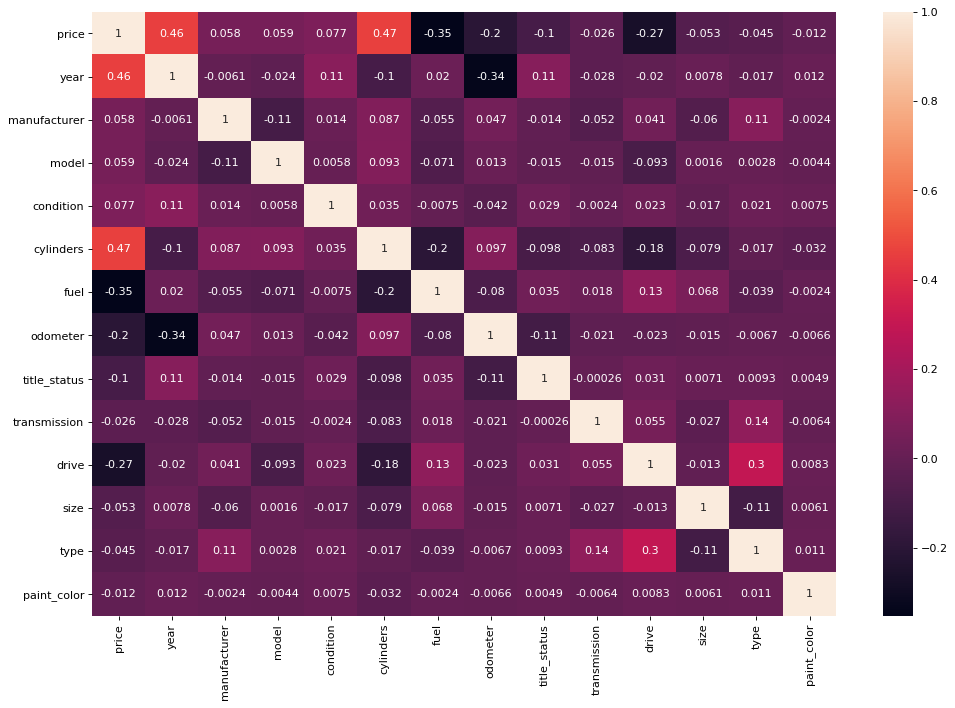

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
sns.heatmap(data.corr(), annot=True)

In [ ]:
data.describe()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color
count,42567.000000,42567.000000,42567.000000,42567.000000,42567.000000,42567.000000,42567.000000,42567.000000,42567.000000,42567.000000,42567.000000,42567.000000,42567.000000,42567.000000
mean,12225.821710,114.227453,27.415369,5495.317993,1.087392,4.400662,1.868936,16.942538,0.372096,0.050391,0.691522,1.216670,3.748162,3.501022
std,7048.959428,2.308990,11.127290,3055.854960,1.279603,1.307183,0.542984,17.163159,1.174477,0.241809,0.719937,0.665051,2.974671,2.904701
min,1060.200000,111.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6836.200000,112.000000,18.000000,3138.000000,0.000000,3.000000,2.000000,9.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
50%,10636.200000,114.000000,33.000000,5343.000000,0.000000,5.000000,2.000000,16.000000,0.000000,0.000000,1.000000,1.000000,4.000000,3.000000
75%,15884.000000,116.000000,37.000000,8185.000000,2.000000,6.000000,2.000000,23.000000,0.000000,0.000000,1.000000,2.000000,5.000000,4.000000
max,39900.000000,121.000000,41.000000,10781.000000,5.000000,7.000000,4.000000,1629.000000,5.000000,2.000000,2.000000,3.000000,12.000000,11.000000


In [ ]:
y = data['price']
data = data.drop(['price'], axis=1)

In [ ]:
X=data

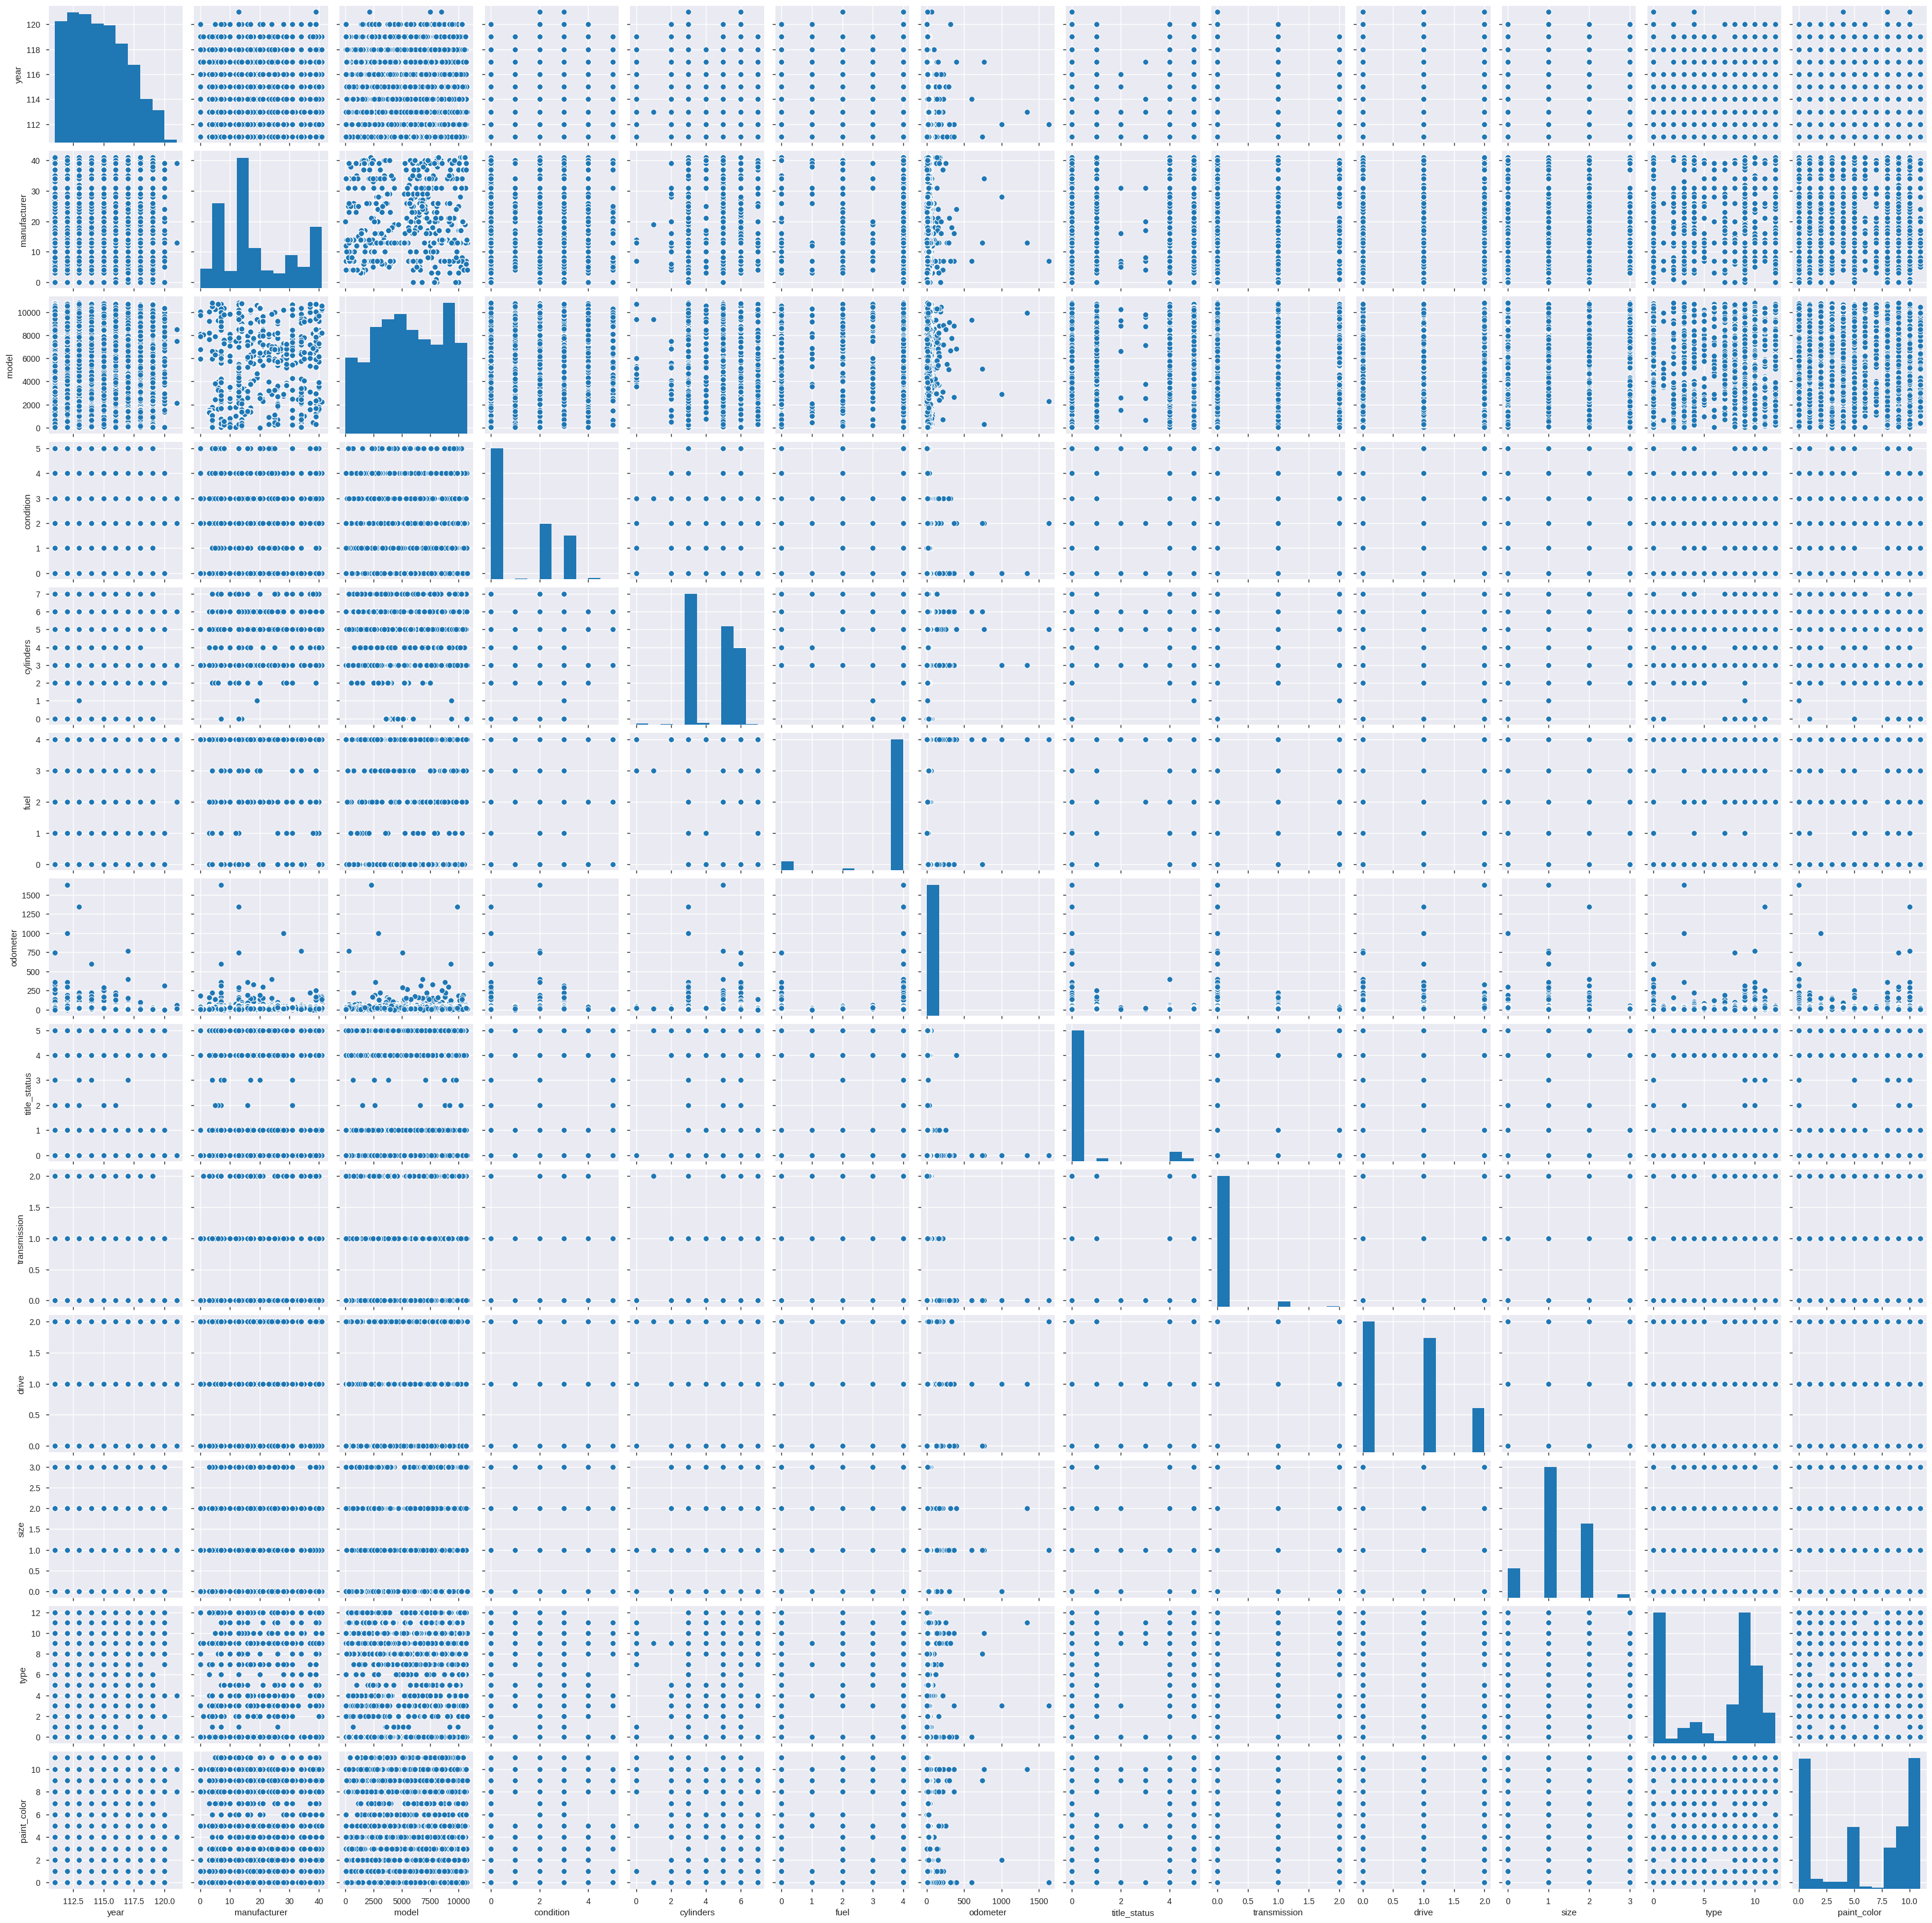

In [ ]:
sns.pairplot(data)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data,y, test_size=0.3, random_state=44)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=pd.DataFrame(sc.fit_transform(X), columns=X.columns)

In [ ]:
X.head(10)

,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color
0,1.236349,1.598900,0.533445,-0.846433,-1.056874,0.287494,-0.644258,-0.318504,-0.209064,-0.975427,-0.326564,-1.425117,-0.200788
1,-0.514092,1.072945,0.220612,-0.846433,-1.056874,0.287494,-0.470393,-0.318504,-0.209064,-0.975427,-1.819121,-1.425117,0.789131
2,-0.951703,-1.644493,0.388213,0.721830,0.480062,0.287494,0.514843,-0.318504,-0.209064,-0.975427,-0.326564,-1.425117,-1.438187
3,-0.514092,-0.504923,-0.424419,0.721830,0.480062,0.287494,0.456888,-0.318504,-0.209064,-0.975427,-0.326564,0.913137,-0.200788
4,-0.951703,1.335922,0.607230,0.721830,1.248530,0.287494,0.167113,-0.318504,-0.209064,-0.975427,-0.326564,0.913137,-1.438187
5,-0.951703,-1.118538,-0.794010,0.721830,0.480062,0.287494,-0.470393,-0.318504,-0.209064,0.417945,1.165993,0.679312,1.036611
6,0.361128,-1.030878,1.051273,-0.846433,1.248530,0.287494,0.340978,-0.318504,-0.209064,-0.975427,-0.326564,0.445486,-0.200788
7,-0.076482,-1.381515,-1.432698,0.721830,-1.056874,0.287494,-0.470393,-0.318504,-0.209064,0.417945,-1.819121,-0.723641,-0.200788
8,1.236349,-0.504923,-0.524579,1.505962,-1.056874,0.287494,-0.586303,3.068146,-0.209064,0.417945,1.165993,-1.425117,-1.190707
9,-1.389313,1.774219,1.500658,0.721830,1.248530,0.287494,0.746663,-0.318504,-0.209064,-0.975427,-0.326564,0.913137,0.789131


In [ ]:
len(X)

41660

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3, random_state=44)

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error
def report(y_pred,y_test):
  print("R2 score:", r2_score(y_test,y_pred))
  print("Mean absolute error:", mean_absolute_error(y_pred,y_test))
  print("MSE :", mean_squared_error(y_test,y_pred))
  print("RMSE: ",(mean_squared_error(y_test,y_pred))**0.5)
  

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rclf=RandomForestRegressor()
rclf.fit(X_train,y_train)
y_pred=rclf.predict(X_test)
report(y_pred,y_test)

R2 score: 0.8717000978611471
Mean absolute error: 1828.4188402079803
MSE : 8804825.59682579
RMSE:  2967.292637544499


In [ ]:
from sklearn.tree import DecisionTreeRegressor
dclf=DecisionTreeRegressor()
dclf.fit(X_train,y_train)
y_pred=dclf.predict(X_test)
report(y_pred,y_test)

R2 score: 0.7594176913580101
Mean absolute error: 2313.2095421103763
MSE : 16510419.992229728
RMSE:  4063.3016122643085


In [ ]:
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor()
ada.fit(X_train,y_train)
y_pred=ada.predict(X_test)
report(y_pred,y_test)

R2 score: 0.615436763772317
Mean absolute error: 4083.4441003817597
MSE : 26391385.881737802
RMSE:  5137.254702828915


In [ ]:
from sklearn.ensemble import BaggingRegressor
bg=BaggingRegressor()
bg.fit(X_train,y_train)
y_pred=bg.predict(X_test)
report(y_pred,y_test)

R2 score: 0.8566321722801299
Mean absolute error: 1956.911706875699
MSE : 9838890.74134338
RMSE:  3136.7006139163777


In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
et=ExtraTreesRegressor()
et.fit(X_train,y_train)
y_pred=et.predict(X_test)
report(y_pred,y_test)

R2 score: 0.8626836166500725
Mean absolute error: 1772.5324326302707
MSE : 9423598.824529806
RMSE:  3069.788074856277
